In [5]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 2743 samples, validate on 686 samples
Epoch 1/20
2743/2743 [==============================] - 235s 86ms/step - loss: 0.6023 - accuracy: 0.6763 - val_loss: 0.4308 - val_accuracy: 0.8178
Epoch 2/20
2743/2743 [==============================] - 224s 82ms/step - loss: 0.3970 - accuracy: 0.8330 - val_loss: 0.3463 - val_accuracy: 0.8484
Epoch 3/20
2743/2743 [==============================] - 223s 81ms/step - loss: 0.3340 - accuracy: 0.8571 - val_loss: 0.3119 - val_accuracy: 0.8484
Epoch 4/20
2743/2743 [==============================] - 221s 81ms/step - loss: 0.2808 - accuracy: 0.8837 - val_loss: 0.2880 - val_accuracy: 0.8834
Epoch 5/20
2743/2743 [==============================] - 244s 89ms/step - loss: 0.2573 - accuracy: 0.8892 - val_loss: 0.2887 - val_accuracy: 0.8805
Epoch 6/20
2743/2743 [==============================] - 229s 84ms/step - loss: 0.2069 - accuracy: 0.9100 - val_loss: 0.3061 - val_accuracy: 0.8615
Epoch 7/20
2743/2743 [==============================] - 220s 80ms/step 

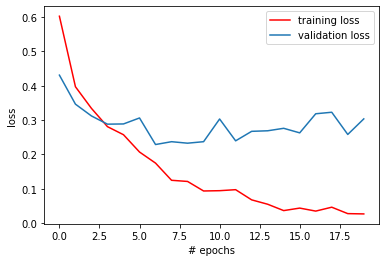

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

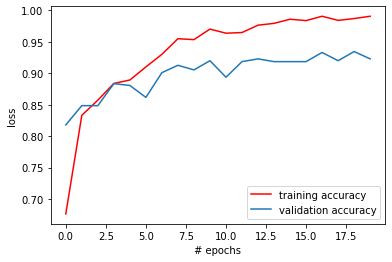

In [10]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
print(model.evaluate(test_data,test_target))

381/381 [==============================] - 8s 20ms/step
[0.4986452634722542, 0.8792650699615479]
